<a href="https://colab.research.google.com/github/alekz7/MachineLearning/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd

data = pd.read_csv('./train.csv')
print(data.shape)
# (891, 12)

(891, 12)


In [106]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
# La columna edad solo tiene 714 valores asi que llenaremos los faltantes con la media
# actualizacion para llenarlo con la media de los datos combinados
print(data['Age'].median()) # 28
#data['Age'] = data['Age'].fillna(data['Age'].median())

28.0


In [0]:
#TODO graficas con las relaciones de los datos para analizar y descartar
# sexo femenino estaba mas relacionado a sobrevivir
# edad es una caracteristica fuerte, 18 40 parece la edad ideal para sobrevivir
# fare tambien es importante, boletos de alto precio tenian mas oportunidad de sobrevivir
# Embarcacion tambien importa y es una caracteristica fuerte

In [0]:
# vamos a combinar el train y el test para hacer Feature Engineering
def combinar_datos():
  train = pd.read_csv('./train.csv')
  test  = pd.read_csv('./test.csv')
  backup_targets = train.Survived
  train.drop(['Survived'],1,inplace = True)
  train_mas_test = train.append(test)
  train_mas_test.reset_index(inplace = True)
  train_mas_test.drop(['index','PassengerId','Cabin'], inplace = True, axis = 1)
  return train_mas_test
train_mas_test = combinar_datos()

In [111]:
train_mas_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [112]:
print(train_mas_test['Age'].median())
# 28
# Mas adelante la vamos a llenar con un promedio por grupos de personas
# data['Age'] = data['Age'].fillna(train_mas_test['Age'].median())

28.0


In [113]:
# la instruccion anterior llena los datos vacios de Age con el promedio de train mas test
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
# Creamos una columna mas con el titulo de la persona
titulos = set()
for name in data['Name']:
  titulos.add(name.split(',')[1].split('.')[0].strip())
print(titulos)
# {'the Countess', 'Don', 'Master', 'Rev', 'Mme', 'Jonkheer', 'Major', 'Sir', 'Ms', 'Mr', 'Mlle', 'Dr', 'Col', 'Mrs', 'Miss', 'Lady', 'Capt'}

{'Miss', 'Col', 'Mrs', 'Mme', 'Major', 'Jonkheer', 'Sir', 'the Countess', 'Don', 'Rev', 'Lady', 'Mr', 'Mlle', 'Ms', 'Dr', 'Capt', 'Master'}


In [0]:
# haciendo un diccionario con los equivalentes
Diccionario_titulos = {
    "Capt": "Oficial",
    "Col": "Oficial",
    "Major": "Oficial",
    "Jonkheer": "Realeza",
    "Don": "Realeza",
    "Sir" : "Realeza",
    "Dr": "Oficial",
    "Rev": "Oficial",
    "the Countess":"Realeza",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Realeza"
}

In [0]:
def obten_titulos():
  train_mas_test['Title'] = train_mas_test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
  train_mas_test['Title'] = train_mas_test.Title.map(Diccionario_titulos)
  return train_mas_test

In [117]:
train_mas_test = obten_titulos()
train_mas_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [118]:
# verificar donde el titulo quedo en null, solo un caso pero no esta en el set de entrenamiento
train_mas_test[train_mas_test['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C,NaN


In [119]:
# tercera aproximacion a la edad, en lugar de llenarlo solo con el promedio de todo el data-set,
# se llenara de acuerdo a una agrupacion de otras columnas posterior a la agrupacion se aplicara el promedio
print(train_mas_test.iloc[:891].Age.isnull().sum())
#177
print(train_mas_test.iloc[891:].Age.isnull().sum())
#86


177
86


In [120]:
# examinando que tan diferentes pueden ser los valores de edad si se agrupan
grouped_train = train_mas_test.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Oficial,49.0
3,female,1,Realeza,40.5
4,female,2,Miss,24.0


In [121]:
grouped_train2 = train_mas_test.iloc[:891].groupby(['Sex','Pclass','Title','Embarked'])
grouped_median_train2 = grouped_train2.median()
grouped_median_train2 = grouped_median_train2.reset_index()[['Sex', 'Pclass', 'Title','Embarked', 'Age']]

grouped_median_train2.head()

,Sex,Pclass,Title,Embarked,Age
0,female,1,Miss,C,30.5
1,female,1,Miss,Q,33.0
2,female,1,Miss,S,23.0
3,female,1,Mrs,C,44.0
4,female,1,Mrs,S,39.0


In [0]:
def llena_edad(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
        # & (grouped_median_train2['Embarked'] == row['Embarked']) 
    ) 
    return grouped_median_train[condition]['Age'].values[0]

def procesa_edad():
    global train_mas_test    
    train_mas_test['Age'] = train_mas_test.apply(lambda row: llena_edad(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return train_mas_test

train_mas_test = procesa_edad()

In [123]:
print(train_mas_test.shape)

(1309, 10)


In [0]:
def procesando_nombres():
    global train_mas_test
    # limpiamos la variable nombre
    train_mas_test.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(train_mas_test['Title'], prefix='Title')
    train_mas_test = pd.concat([train_mas_test, titles_dummies], axis=1)
    
    # removing the title variable
    train_mas_test.drop('Title', axis=1, inplace=True)
        
    return train_mas_test

In [125]:
train_mas_test = procesando_nombres()

train_mas_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Oficial,Title_Realeza
0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,S,0,0,1,0,0,0


In [0]:
def procesando_fares():
    global train_mas_test
    # there's one missing fare value - replacing it with the mean.
    train_mas_test.Fare.fillna(train_mas_test.iloc[:891].Fare.mean(), inplace=True)
    return train_mas_test
train_mas_test = procesando_fares()

In [0]:
def procesando_embarked():
    global train_mas_test
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    train_mas_test.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(train_mas_test['Embarked'], prefix='Embarked')
    train_mas_test = pd.concat([train_mas_test, embarked_dummies], axis=1)
    train_mas_test.drop('Embarked', axis=1, inplace=True)
    return train_mas_test
train_mas_test = procesando_embarked()

In [128]:
train_mas_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Oficial,Title_Realeza,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1


In [0]:
# No voy a procesar Cabin por que creo que es un dato irrelevante

In [0]:
def procesa_sexo():
    global train_mas_test
    # mapping string values to numerical one 
    train_mas_test['Sex'] = train_mas_test['Sex'].map({'male':1, 'female':0})
    return train_mas_test
train_mas_test = procesa_sexo()

In [0]:
def procesando_pclass():
    
    global train_mas_test
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(train_mas_test['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    train_mas_test = pd.concat([train_mas_test, pclass_dummies],axis=1)
    
    # removing "Pclass"
    train_mas_test.drop('Pclass',axis=1,inplace=True)
    
    return train_mas_test
train_mas_test = procesando_pclass()    

In [132]:
#Procesando el ticket
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in train_mas_test['Ticket']:
    tickets.add(cleanTicket(t))

print(len(tickets))
#37


def procesando_ticket():
    
    global train_mas_test
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))        
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'    

    # Extracting dummy variables from tickets:

    train_mas_test['Ticket'] = train_mas_test['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(train_mas_test['Ticket'], prefix='Ticket')
    train_mas_test = pd.concat([train_mas_test, tickets_dummies], axis=1)
    train_mas_test.drop('Ticket', inplace=True, axis=1)

    return train_mas_test

train_mas_test = procesando_ticket()

37


In [0]:
def procesando_familia():
    
    global train_mas_test
    # introducing a new feature : the size of families (including the passenger)
    train_mas_test['FamilySize'] = train_mas_test['Parch'] + train_mas_test['SibSp'] + 1
    
    # introducing other features based on the family size
    train_mas_test['Singleton'] = train_mas_test['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    train_mas_test['SmallFamily'] = train_mas_test['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    train_mas_test['LargeFamily'] = train_mas_test['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return train_mas_test
train_mas_test = procesando_familia()

In [134]:
train_mas_test.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Oficial,Title_Realeza,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [135]:
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [0]:
def recover_train_test_target():
    global train_mas_test
    
    targets = pd.read_csv('./train.csv', usecols=['Survived'])['Survived'].values
    train = train_mas_test.iloc[:891]
    test = train_mas_test.iloc[891:]
    
    return train, test, targets

train, test, targets = recover_train_test_target()

In [0]:
#Definiendo los clasificadores
#Definicion
clf = tree.DecisionTreeClassifier()
clf1 = svm.SVC()
clf2 = neighbors.KNeighborsClassifier()
clf3 = GaussianNB()

In [139]:
#Training
print("Entrenando clasificadores")
clf = clf.fit(train,targets)
clf1 = clf1.fit(train,targets)
clf2 = clf2.fit(train,targets)
clf3 = clf3.fit(train,targets)

Entrenando clasificadores


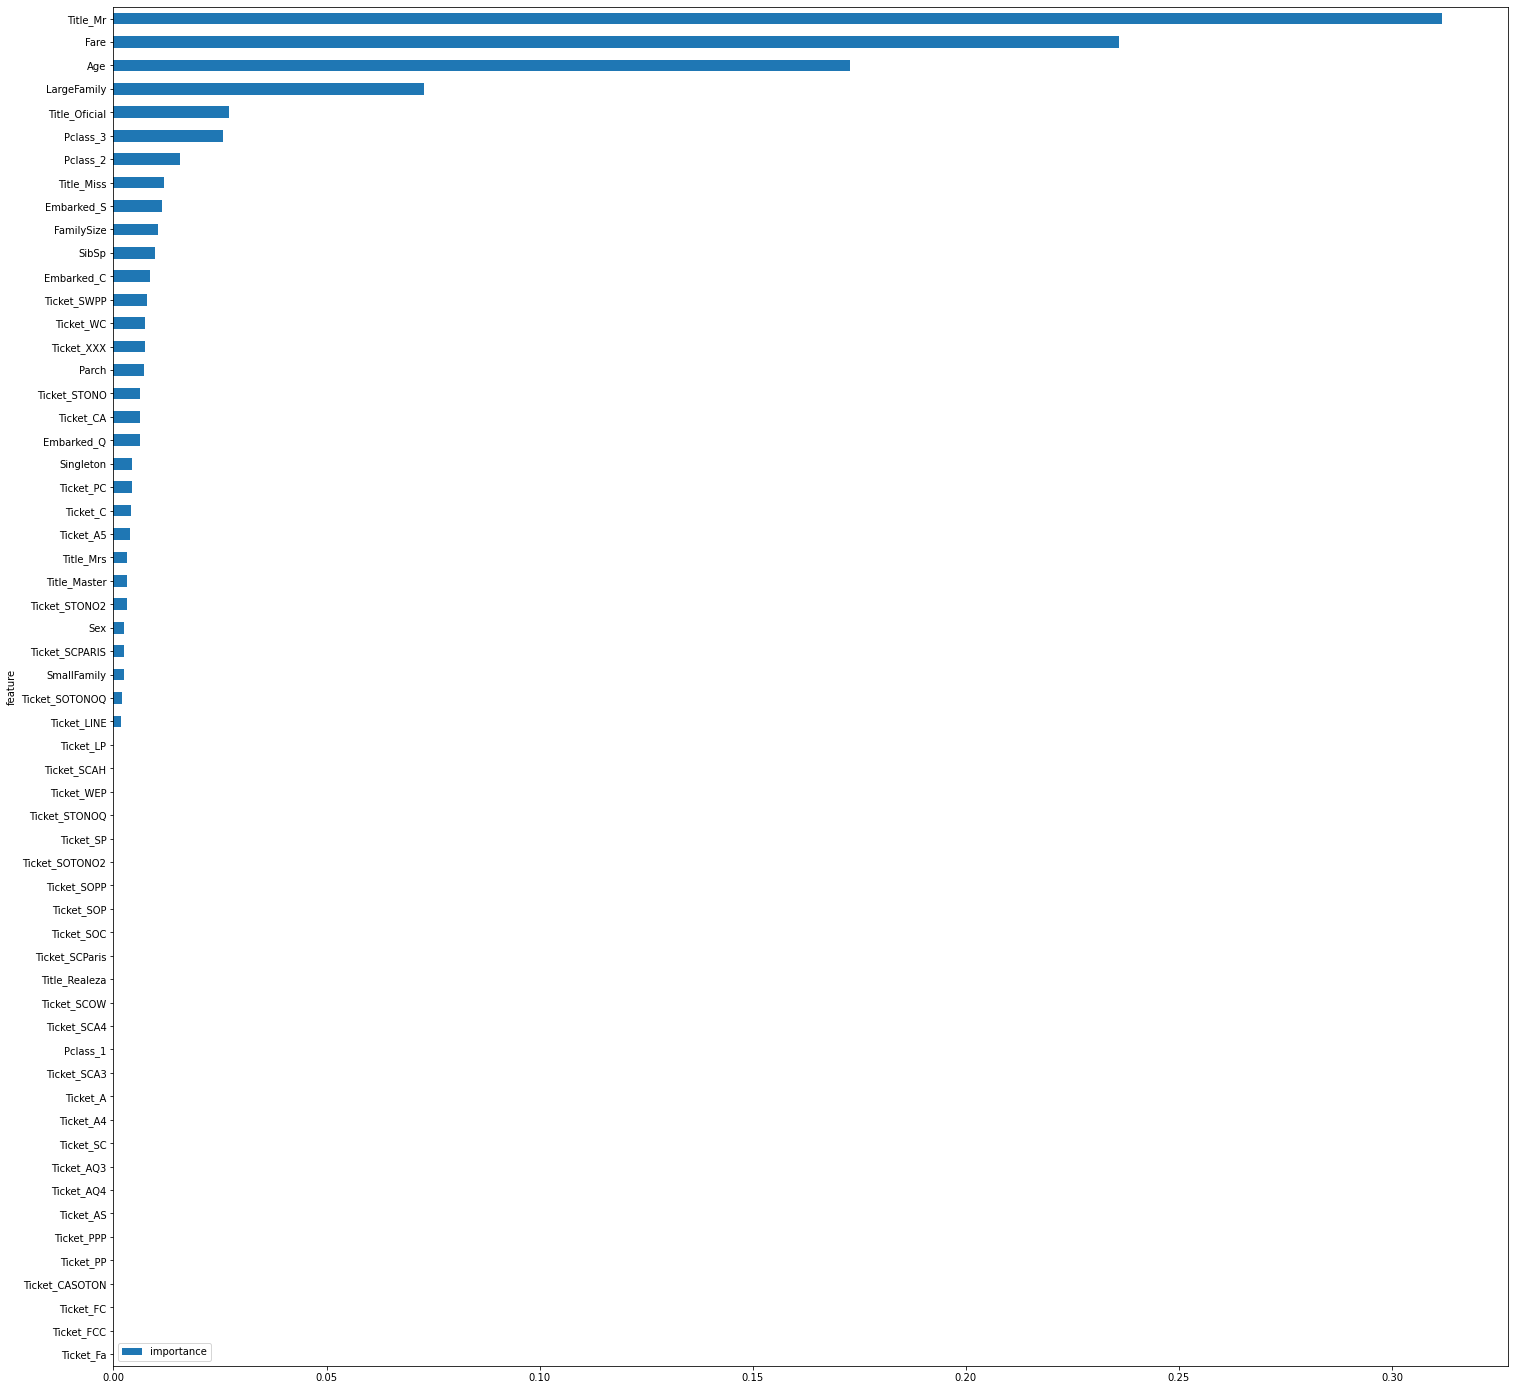

In [140]:
features = pd.DataFrame()
features['feature'] = train.columns
# solo DecisionTreeClassifier tiene feature_importances
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [141]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]
models2 = [logreg, logreg_cv, rf, gboost, clf, clf1, clf2, clf3]

for model in models2:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CV score = 0.8271608813006089
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CV score = 0.8260372857949909
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8024606113866047
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8282907538760906
****
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 0.7789153223275375
****
Cross-validation of : <class 'sklearn.svm._classes.SVC'>
CV score = 0.676862720482079
****
Cross-validation of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CV score = 0.7059883246500533
****
Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV score = 0.44441654635616096
****


Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CV score = 0.8271608813006089
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CV score = 0.8260372857949909
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8103195028560668
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.8282907538760906
****
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 0.7822672776348002
****
Cross-validation of : <class 'sklearn.svm._classes.SVC'>
CV score = 0.676862720482079
****
Cross-validation of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CV score = 0.7059883246500533
****
Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV score = 0.44441654635616096
****


In [0]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)


In [0]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('./test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./predictions_gridsearch_rf.csv', index=False)


SCORE EN KAGGLE 0.78947